Imported standard packages for data anaylsis and machine learning.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Data Wrangling and Cleaning

I decided to download the data from [Data World Bank](https://data.worldbank.org/indicator/SP.POP.TOTL), because there is a wide variety of features (variables) that exista in the database. Also, Data World Bank provided a larger range of years than I could find elsewhere.

In [2]:
file_path = '../data/world_population.csv'
data = pd.read_csv(file_path, skiprows=4)
data.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Aruba,ABW,"Population, total",SP.POP.TOTL,54208.0,55434.0,56234.0,56699.0,57029.0,57357.0,...,102050.0,102565.0,103165.0,103776.0,104339.0,104865.0,105361.0,105846.0,106310.0,106766.0
1,Africa Eastern and Southern,AFE,"Population, total",SP.POP.TOTL,130836765.0,134159786.0,137614644.0,141202036.0,144920186.0,148769974.0,...,532760424.0,547482863.0,562601578.0,578075373.0,593871847.0,609978946.0,626392880.0,643090131.0,660046272.0,677243299.0
2,Afghanistan,AFG,"Population, total",SP.POP.TOTL,8996967.0,9169406.0,9351442.0,9543200.0,9744772.0,9956318.0,...,30117411.0,31161378.0,32269592.0,33370804.0,34413603.0,35383028.0,36296111.0,37171922.0,38041757.0,38928341.0
3,Africa Western and Central,AFW,"Population, total",SP.POP.TOTL,96396419.0,98407221.0,100506960.0,102691339.0,104953470.0,107289875.0,...,360285439.0,370243017.0,380437896.0,390882979.0,401586651.0,412551299.0,423769930.0,435229381.0,446911598.0,458803476.0
4,Angola,AGO,"Population, total",SP.POP.TOTL,5454938.0,5531451.0,5608499.0,5679409.0,5734995.0,5770573.0,...,24220660.0,25107925.0,26015786.0,26941773.0,27884380.0,28842482.0,29816769.0,30809787.0,31825299.0,32866268.0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Data columns (total 65 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Name    266 non-null    object 
 1   Country Code    266 non-null    object 
 2   Indicator Name  266 non-null    object 
 3   Indicator Code  266 non-null    object 
 4   1960            264 non-null    float64
 5   1961            264 non-null    float64
 6   1962            264 non-null    float64
 7   1963            264 non-null    float64
 8   1964            264 non-null    float64
 9   1965            264 non-null    float64
 10  1966            264 non-null    float64
 11  1967            264 non-null    float64
 12  1968            264 non-null    float64
 13  1969            264 non-null    float64
 14  1970            264 non-null    float64
 15  1971            264 non-null    float64
 16  1972            264 non-null    float64
 17  1973            264 non-null    flo

I removed the Country and Indicator names and codes, because I was only interested in the total population. I further filtered the dataset by only accessing the total population value for the Indicator Name feature, and I decided to drop all NA values as there were only four records with NA's. Also, I did not have to change the Dtype for each record, beacuse Pandas assumed the columns were floats. All this is confirmed by utilizing the info command on the dataset.

In [4]:
cols_to_exclude = ['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code']
data = data[data['Indicator Name'] == 'Population, total'].dropna()
data = data.loc[:, ~data.columns.isin(cols_to_exclude)]
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 262 entries, 0 to 265
Data columns (total 61 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   1960    262 non-null    float64
 1   1961    262 non-null    float64
 2   1962    262 non-null    float64
 3   1963    262 non-null    float64
 4   1964    262 non-null    float64
 5   1965    262 non-null    float64
 6   1966    262 non-null    float64
 7   1967    262 non-null    float64
 8   1968    262 non-null    float64
 9   1969    262 non-null    float64
 10  1970    262 non-null    float64
 11  1971    262 non-null    float64
 12  1972    262 non-null    float64
 13  1973    262 non-null    float64
 14  1974    262 non-null    float64
 15  1975    262 non-null    float64
 16  1976    262 non-null    float64
 17  1977    262 non-null    float64
 18  1978    262 non-null    float64
 19  1979    262 non-null    float64
 20  1980    262 non-null    float64
 21  1981    262 non-null    float64
 22  19

---


In [5]:
years = data.columns
dataset = pd.DataFrame(data.sum())
dataset.reset_index(level=0, inplace=True)
dataset.columns = ['Year', 'Total World Population']
dataset['Year'] = pd.to_numeric(dataset['Year'])
dataset

,Year,Total World Population
0,1960,3.096898e+10
1,1961,3.137735e+10
2,1962,3.193412e+10
3,1963,3.262582e+10
4,1964,3.332311e+10
...,...,...
56,2016,7.997438e+10
57,2017,8.098848e+10
58,2018,8.198146e+10
59,2019,8.295339e+10


## Visualization

Text(0, 0.5, 'Total Population')

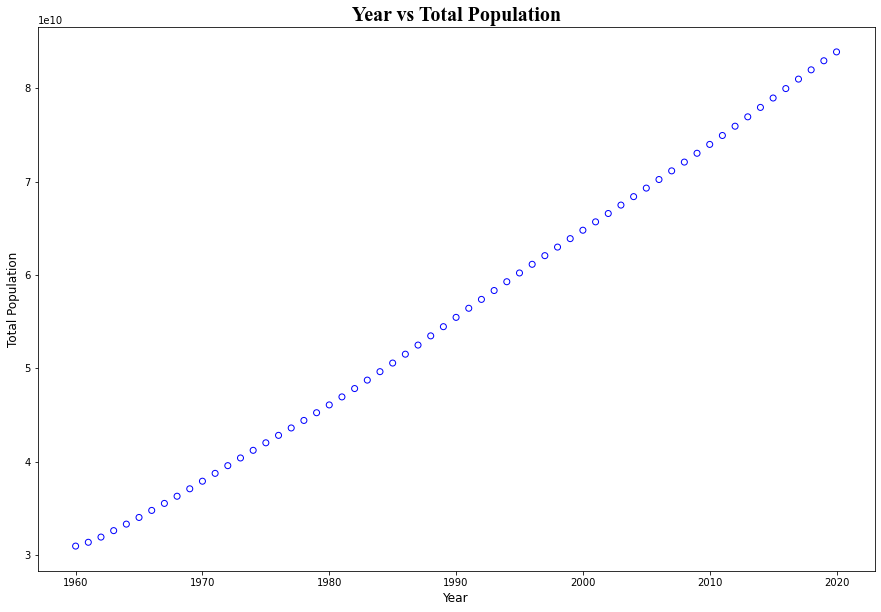

In [8]:
import matplotlib
matplotlib.rc('figure', figsize=(15, 10))

plt.scatter(dataset['Year'], dataset['Total World Population'], facecolors='none', edgecolors='b')
plt.title('Year vs Total Population', fontname="Times New Roman",fontweight="bold", fontsize=20)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Total Population', fontsize=12)